In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

sns.set_theme(context="paper",
              style="whitegrid",
              font_scale=1.2,
              rc={"xtick.bottom": True,
                   "xtick.top": False,
                   "ytick.left": True,
                   "ytick.right": False,
                   "axes.grid": True,
                   "figure.autolayout": False,
                   "axes.edgecolor": ".15"
                  })

In [2]:
# df = pd.read_csv('datafile3A.txt', delim_whitespace=True, header=None,skiprows=40)
# df.columns = ["RAdeg", "DEdeg", "VDis", "e_VDis", "Rad", "e_Rad", "SB", "e_SB", "MagDev", "e_MagDev", "MagMod", "e_MagMod", "Kcorr", "Nden"]

df = pd.read_csv('datafile3A.txt', delim_whitespace=True, header=None,skiprows=37)
df.columns = ["RAdeg", "DEdeg", "VDis", "e_VDis", "Rad", "e_Rad", "SB", "e_SB", "MagDev", "e_MagDev", "MagMod", "e_MagMod", "Kcorr", "Nden"]

In [3]:
df

,RAdeg,DEdeg,VDis,e_VDis,Rad,e_Rad,SB,e_SB,MagDev,e_MagDev,MagMod,e_MagMod,Kcorr,Nden
0,113.810738,36.307522,2.501,0.034,0.979,0.020,19.873,0.060,-23.587,0.033,-23.587,0.033,0.309,4
1,115.321098,37.511093,2.133,0.029,0.600,0.007,19.918,0.020,-21.648,0.018,-21.648,0.018,0.104,4
2,114.201271,36.971313,2.055,0.045,0.414,0.012,19.993,0.034,-20.643,0.021,-20.643,0.021,0.093,3
3,114.306282,37.111927,2.363,0.022,0.664,0.010,19.620,0.030,-22.268,0.019,-22.268,0.019,0.159,2
4,113.294510,36.370544,2.307,0.040,0.871,0.017,19.944,0.052,-22.978,0.029,-22.978,0.029,0.268,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,30.930828,14.361772,2.365,0.039,0.344,0.012,18.953,0.035,-21.333,0.022,-21.333,0.022,0.122,3
8662,31.232372,14.015410,2.143,0.019,0.339,0.003,19.547,0.007,-20.715,0.012,-20.715,0.012,0.036,4
8663,31.649361,13.976053,2.148,0.044,0.893,0.008,21.120,0.024,-21.911,0.017,-21.911,0.017,0.103,3
8664,31.278042,14.055018,2.486,0.023,0.588,0.004,19.211,0.007,-22.297,0.012,-22.297,0.012,0.105,100


In [4]:
# ![html](https://i.imgur.com/uwAw9Pw.png)

# A. EDA

In [5]:
df

,RAdeg,DEdeg,VDis,e_VDis,Rad,e_Rad,SB,e_SB,MagDev,e_MagDev,MagMod,e_MagMod,Kcorr,Nden
0,113.810738,36.307522,2.501,0.034,0.979,0.020,19.873,0.060,-23.587,0.033,-23.587,0.033,0.309,4
1,115.321098,37.511093,2.133,0.029,0.600,0.007,19.918,0.020,-21.648,0.018,-21.648,0.018,0.104,4
2,114.201271,36.971313,2.055,0.045,0.414,0.012,19.993,0.034,-20.643,0.021,-20.643,0.021,0.093,3
3,114.306282,37.111927,2.363,0.022,0.664,0.010,19.620,0.030,-22.268,0.019,-22.268,0.019,0.159,2
4,113.294510,36.370544,2.307,0.040,0.871,0.017,19.944,0.052,-22.978,0.029,-22.978,0.029,0.268,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,30.930828,14.361772,2.365,0.039,0.344,0.012,18.953,0.035,-21.333,0.022,-21.333,0.022,0.122,3
8662,31.232372,14.015410,2.143,0.019,0.339,0.003,19.547,0.007,-20.715,0.012,-20.715,0.012,0.036,4
8663,31.649361,13.976053,2.148,0.044,0.893,0.008,21.120,0.024,-21.911,0.017,-21.911,0.017,0.103,3
8664,31.278042,14.055018,2.486,0.023,0.588,0.004,19.211,0.007,-22.297,0.012,-22.297,0.012,0.105,100


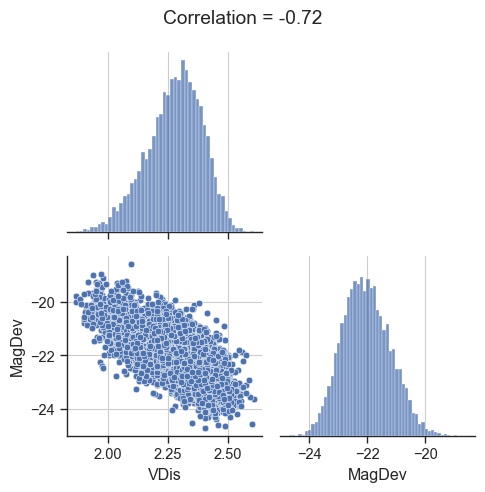

In [6]:
vars_interest = ["VDis","MagDev"]
corr_val = df.loc[:,vars_interest].corr().to_numpy()[0,1]

ax = sns.pairplot(df,vars=vars_interest,corner=True)
plt.suptitle(f"Correlation = {corr_val:.2f}")
plt.tight_layout()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(0.675, 0.9))
plt.show()

# B. PCA

In [7]:
X = df.loc[:,["VDis","Rad","SB","MagDev","MagMod","Kcorr"]].to_numpy()
# Choose the relevant quantity values

#### (i) First, find how many PCA axes to use

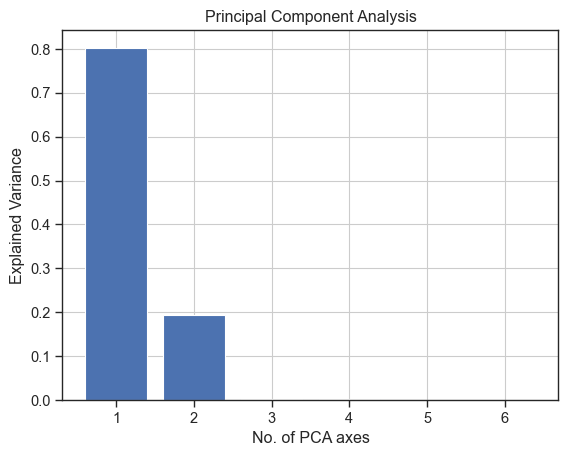

In [8]:
max_n = X.shape[1]

pca = PCA(n_components = max_n)
 
_ = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

plt.bar(x=np.arange(max_n)+1,height=explained_variance)
plt.title("Principal Component Analysis")
plt.xlabel("No. of PCA axes")
plt.ylabel("Explained Variance")
plt.show()

The first two axes capture ~99% of the variance, so we'll use only those two.

That is, choose $n_{\text{pca}} = 2 $.

In [9]:
n_pca = 2

pca = PCA(n_components = n_pca)
X_pca = pca.fit_transform(X)
percent_captured = (pca.explained_variance_ratio_.sum()*100/1)

print(f"Percentage of variance captured by {n_pca} dimensions = {percent_captured:.2f} %")

Percentage of variance captured by 2 dimensions = 99.53 %


In [10]:
df_pca = pd.DataFrame(data=X_pca,columns=["PCA Axis 1", "PCA Axis 2"])

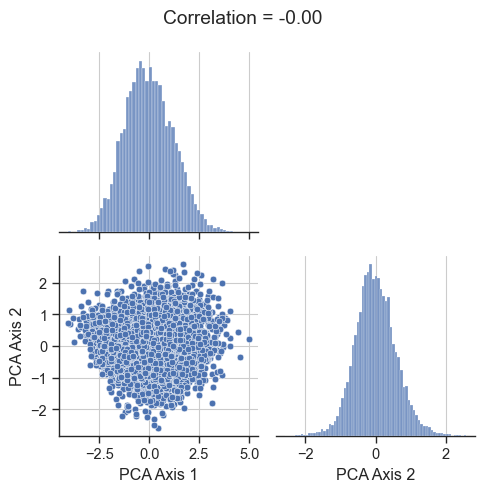

In [11]:
vars_interest = ["PCA Axis 1","PCA Axis 2"]
corr_val = df_pca.loc[:,vars_interest].corr().to_numpy()[0,1]

ax = sns.pairplot(df_pca,vars=vars_interest,corner=True)
plt.suptitle(f"Correlation = {corr_val:.2f}")
plt.tight_layout()
# sns.move_legend(ax, "upper left", bbox_to_anchor=(0.675, 0.9))
plt.show()

# C. Fundamental Plane

In [ ]:
X[:,[0,1,2,3,4,6,8,9]] = X[:,[0,1,2,3,4,6,8,9]].astype("float")

In [ ]:
2 vdis
5 rad
7 SB

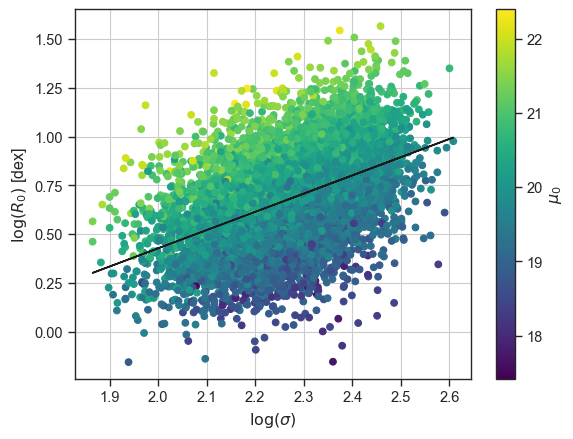

In [34]:
res = stats.linregress(df["VDis"], df["Rad"])
plt.scatter(df["VDis"], df["Rad"], c = df["SB"], cmap="viridis")
plt.xlabel(r"$\log (\sigma)$")
plt.ylabel(r"$\log (R_{0}) $ [dex]")
plt.colorbar(label=r"$\mu_0$")
plt.plot(df["VDis"], res.intercept + res.slope*df["VDis"], 'k')
plt.show()

In [ ]:
res_r_sb = stats.linregress(data[:,5].astype("float"), data[:,7].astype("float"))

plt.scatter(data[:,5], data[:,7], c = data[:,2], cmap="cool")
plt.ylabel("Log(R-band Physical Half-Light Radius) (kpc)")
plt.xlabel(r'R-Band Surface Brightness (mag/${\rm arcsec^2}$)')
plt.colorbar(label="Log(Velocity Dispersion) (km/s)")
plt.plot(data[:,5], res_r_sb.intercept + res_r_sb.slope*data[:,5], 'k')
plt.show()
